# Make some of the figures for the 54043-5 paper

In [1]:
# Public clonotype related imports
# !conda install -c anaconda biopython -y
# !conda install pandas -y
# !conda install matplotlib -y

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import paper_helper_functions as hf

In [5]:
# Buried surface area related imports
# Don't need to install and import these things if you don't want to replicate that section
# !pip install python-Levenshtein
# For this next one you only need to generate DSSP files
# It only works on Unix including WSL
# !conda install -c salilab dssp
# !conda install -c conda-forge pymol-open-source

from Bio.SeqUtils import seq3
from collections import defaultdict

In [4]:
# This would download the equivalent database, more up to date
# !curl -o data/230613_covabdab_search_results.csv https://opig.stats.ox.ac.uk/webapps/covabdab/static/downloads/CoV-AbDab_130623.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 36 8183k   36 2991k    0     0  1675k      0  0:00:04  0:00:01  0:00:03 1676k
 91 8183k   91 7519k    0     0  2700k      0  0:00:03  0:00:02  0:00:01 2702k
100 8183k  100 8183k    0     0  2730k      0  0:00:02  0:00:02 --:--:-- 2732k


## Figure 4A, CDR3 identity public clonotype scatter plot

In [2]:
# Make fig 4A
# 54043-5's sequence attributes
our_hvgene = "IGHV4-31"
our_lvgene = "IGKV3-15"
our_hcdr3 = "ARGFLGYCAGGSCFLNWLDP"
our_lcdr3 = "HQYHNWLLT"

# Prepare the reference database to search through (CoVAbDab
covabdab_fname = "data/230221_covabdab_search_results.csv"
covdf = hf.prep_human_covabdab(covabdab_fname)

# Search through it
pts, our_num_h_blue, our_num_l_blue, similar_abs = hf.get_similar_seq_feature_pts(our_hvgene, our_lvgene, our_hcdr3, our_lcdr3, refdf=covdf, cdrh3_cutoff=0.5, cdrl3_cutoff=0.5)

similar_abs.sort_values(by=['CGroup', 'CDRH3_ID', 'CDRL3_ID'], ascending=False)

,index,Name,Ab or Nb,Binds to,Doesn't Bind to,Neutralising Vs,Not Neutralising Vs,Protein + Epitope,Origin,VHorVHH,...,Human,HV,LV,HV+,LV+,CDRH3_ID,CDRL3_ID,CDRH3+,CDRL3+,CGroup
6433,6487,C692,Ab,SARS-CoV2_WT,NaN,SARS-CoV2_WT (weak),NaN,S; RBD,B-cells; SARS-CoV2_WT Human Patient,QVQLQESGPGLVKPSQTLSLTCTVSGDSVSSGDYYWSWIRQHPGKG...,...,True,IGHV4-31,IGKV3-15,True,True,0.350000,0.555556,False,True,3
8791,8976,PDI-298,Ab,SARS-CoV2_WT (weak),NaN,SARS-CoV2_WT (weak),NaN,S; RBD,B-cells; SARS-CoV2 Human Patient,QVQLQESGPGLVKPSQTLSLTCTVSGGSISSGGYYWSWIRQHPGKG...,...,True,IGHV4-31,IGKV3-15,True,True,0.250000,0.555556,False,True,3
1721,1763,Ab_511A1,Ab,SARS-CoV2_WT,NaN,NaN,NaN,S; RBD,B-cells; SARS-CoV2_WT Human Patient,QVQLQESGPGLVKPSQTLSLTCTVSGGSISSGGYYWSWIRQHPGKG...,...,True,IGHV4-31,IGKV3-15,True,True,0.238095,0.500000,False,True,3
5202,5255,C1014,Ab,SARS-CoV2_WT,NaN,NaN,SARS-CoV2_WT,S; RBD,B-cells; SARS-CoV2_WT Human Patient,QVQLQESGPGLVRPSQTLSLTCTVSGGSIGSGAYWSWIRQHPAKGL...,...,True,IGHV4-31,IGKV3-15,True,True,0.142857,0.400000,False,False,3
2423,2473,BD55-1570,Ab,SARS-CoV2_WT;SARS-CoV1,NaN,SARS-CoV2_WT (weak);SARS-CoV1(weak),SARS-CoV2_Omicron-BA2.12.1;Pangolin-GD;SARS-Co...,S; RBD,B-cells (SARS-CoV2 Human Patient and/or Vaccinee),QVQLQESGPGLVKPSQTLSLTCTVSGDSFISGNFYWSWIRQHPGKG...,...,True,IGHV4-31,IGKV3-15,True,True,0.142857,0.400000,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,4353,BD56-632,Ab,SARS-CoV2_WT;SARS-CoV2_Omicron-BA1;SARS-CoV2_O...,NaN,SARS-CoV2_WT;SARS-CoV2_Omicron-BA1;SARS-CoV2_O...,SARS-CoV1;SARS-CoV2_Omicron-XBB,S; RBD,B-cells (SARS-CoV2 Human Patient and/or Vaccinee),QVQLVESGGGVVQPGRSLRLSCAASGFSFSNYAMHWVRQAPGKGLE...,...,True,IGHV3-30,IGKV3-11,False,False,0.100000,0.555556,False,True,0
8033,8137,H025771+K023698,Ab,SARS-CoV1;SARS-CoV2_WT,MERS-CoV,NaN,NaN,N,B-cells; SARS-CoV2_WT Human Patient,EVQLVESGGGLVQPGGSLRLSCSASGFTFSSYAMHWVRQAPGKGLE...,...,True,IGHV3-64,IGKV1-33,False,False,0.100000,0.555556,False,True,0
7651,7717,D70678-2155-S1,Ab,SARS-CoV2_WT,NaN,NaN,NaN,S; Unk,Transgenic Mouse (Alloy GK),QVQLVESGGDLVKPGGSLRLSCAASGFTFSNAWMTWVRQAPGKELE...,...,True,IGHV3-15,IGKV1-33,False,False,0.100000,0.555556,False,True,0
2290,2340,BD-817,Ab,SARS-CoV2_WT;SARS-CoV1,NaN,SARS-CoV2_WT (weak),SARS-CoV1;SARS-CoV2_Omicron-BA1;SARS-CoV2_Omic...,S; RBD,B-cells (SARS-CoV2 Human Patient/Vaccinee),QVQLVQSGTEVKRPGSSVKVSCKISGGTFSNYAITWVRQAPGQGLE...,...,True,IGHV1-69,IGKV1-33,False,False,0.100000,0.555556,False,True,0


#### Do the actual plotting

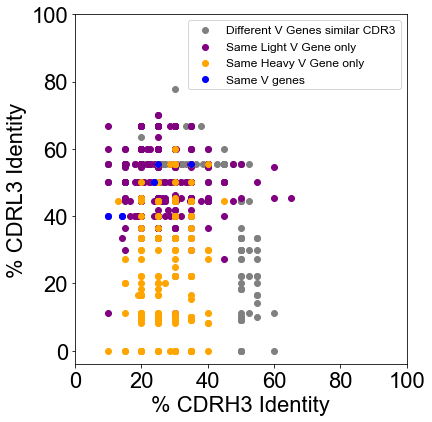

In [3]:
# Set up plotting things
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 22
plt.rcParams['legend.fontsize'] = 12
fig, ax = plt.subplots()
fig.set_size_inches((6, 6))
plt.tight_layout()


color_dict = {0: "gray", 1: "purple", 2: "orange", 3: "blue"}
legend_dict = {0: "Different V Genes similar CDR3", 1: "Same Light V Gene only", 2: "Same Heavy V Gene only", 3: "Same V genes"}
last_c = -1
for x, y, c in sorted(pts, key=lambda x: x[2]):
    if c != last_c:
        ax.scatter(x * 100, y * 100, color=color_dict[c], label=legend_dict[c])
    else:
        ax.scatter(x * 100, y * 100, color=color_dict[c])
    last_c = c

plt.legend(loc='upper right')
plt.xticks([0, 20, 40, 60, 80, 100])
plt.yticks([0, 20, 40, 60, 80, 100])

plt.xlabel("% CDRH3 Identity")
plt.ylabel("% CDRL3 Identity")
plt.rcParams['font.size'] = 26
plt.show()

## Figure 4B, Aggregate number of loosely defined public clones
- first you need to run code for figure 4A to get variables our_num_h_blue, our_num_l_blue and "cov_df"

Load the data of S2-specific antibodies

In [4]:
s2_mabs_df = pd.read_csv("data/230302_supp_hcdr3_plot_abs.csv")
s2_mabs_df

,MAB,V_CALL.H,V_CALL.L,CDRH3,CDRL3,CATEGORY
0,CV3-25,IGHV5-51,IGKV1-12,ARLPQYCSNGVCQRWFDP,QQGNSFPYT,sh
1,S2P6,IGHV1-46,IGKV3-20,ARGSPKGAFDY,QQYGSSPPRFT,sh
2,CC40.8,IGHV3-23,IGLV3-10,AITMAPVV,YSTDSSGNHAV,sh
3,COV30-14,IGHV1-46,IGKV3-20,AKMSRAGGFDV,QHFASSPPTYT,sh
4,COV93-03,IGHV1-46,IGKV3-20,AGDYYLDY,QQYGSSPPMYT,sh
5,COV89-22,IGHV1-46,IGKV3-20,ARGADHGAFDI,QQYDSSPPMYI,sh
6,76E1,IGHV3-43,IGLV2-11,AALVIVAAGDDFDL,CSYGGRNNLI,fp
7,C13B8,IGHV4-31,IGLV3-16,ATSIVLTGMSNKIQPFDY,LSADTSGTWV,fp
8,VN01H1,IGHV3-64,IGKV3-15,VKNSDVFRFPHLYFDV,QQYDNWPSIT,fp
9,VP12E7,IGHV3-64,IGKV1-9,VKGLDVLRFLDLSTPSGERLDAFDI,QQLNSYPLFT,fp


Screen them all against the CoVAbDab

In [5]:
abs_to_screen_df = s2_mabs_df.copy()
screen_against_df = covdf.copy()

all_pts = []  # This is used for a supplemental figure
all_blue_points = []  # This is used for aggregate plot
for i, row in abs_to_screen_df.iterrows():

    pts, num_h_blue, num_l_blue, df = hf.get_similar_seq_feature_pts(hv=row['V_CALL.H'], lv=row['V_CALL.L'],
                                                             cdrh3=row['CDRH3'], cdrl3=row['CDRL3'],
                                                             refdf=screen_against_df)

    all_pts.append((row['MAB'], pts))
    all_blue_points.append((row['MAB'], num_h_blue, num_l_blue, row['CATEGORY']))

# Add ours in we calculated earlier
all_blue_points = [("54043-5", our_num_h_blue, our_num_l_blue, "54043-5")] + all_blue_points

all_blue_points  # Print out results

[('54043-5', 0, 3, '54043-5'),
 ('CV3-25', 1, 8, 'sh'),
 ('S2P6', 8, 30, 'sh'),
 ('CC40.8', 1, 3, 'sh'),
 ('COV30-14', 2, 11, 'sh'),
 ('COV93-03', 1, 30, 'sh'),
 ('COV89-22', 8, 16, 'sh'),
 ('76E1', 1, 1, 'fp'),
 ('C13B8', 2, 1, 'fp'),
 ('VN01H1', 2, 3, 'fp'),
 ('VP12E7', 1, 2, 'fp'),
 ('DH1058', 5, 24, 'fp'),
 ('C77G12', 1, 3, 'fp'),
 ('C13C9', 1, 1, 'fp'),
 ('COV44-62', 1, 12, 'fp'),
 ('COV91-27', 1, 27, 'fp'),
 ('COV44-79', 1, 11, 'fp'),
 ('COVA1-07', 40, 109, 's2p'),
 ('COVA2-14', 43, 110, 's2p'),
 ('COVA2-18', 39, 111, 's2p')]

[]

<Figure size 432x288 with 0 Axes>

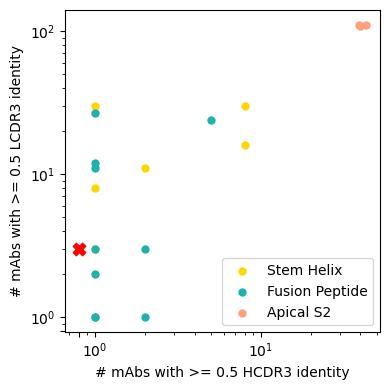

In [6]:
# Define mapping of colors to antibody groups
color_dict = {"sh": "gold", "ours": "red", "fp": "lightseagreen", "s2p": "lightsalmon"}
legend_dict = {"sh": "Stem Helix", "ours": "54043-5", "fp": "Fusion Peptide", "s2p": "Apical S2"}

# Set up plot format
plt.clf()
plt.rcdefaults()

fig, ax = plt.subplots()
fig.set_size_inches((4, 4))

plt.xlabel("# mAbs with >= 0.5 HCDR3 identity")
plt.ylabel("# mAbs with >= 0.5 LCDR3 identity")

# Do the actual plotting
last_c = -1
ours = True
for ref_ab, num_h_blue, num_l_blue, c in all_blue_points:
    # For a log axis this is necessary
    if num_h_blue == 0:
        num_h_blue = .8
    if num_l_blue == 0:
        num_l_blue = 0.8

    if ours:  # Make our marker different and bigger
        ours = False
        ax.scatter(.8, 3, color=color_dict["ours"], marker="X", s=80)
        continue

    if c != last_c:  # Avoid duplicates on legend
        ax.scatter(num_h_blue, num_l_blue, color=color_dict[c], label=legend_dict[c], marker="o", linewidth=0)
    else:
        ax.scatter(num_h_blue, num_l_blue, color=color_dict[c], marker="o", linewidth=0)

    last_c = c

plt.legend(loc='lower right')
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.xticks([.8, 1, 10, 100])
plt.yticks([.8, 1, 10, 100])
plt.plot()

# Figure S4 Clonotype frequency of S2-binding antibodies
- Need to run all previous non-plotting cells to get the `all_pts` variable

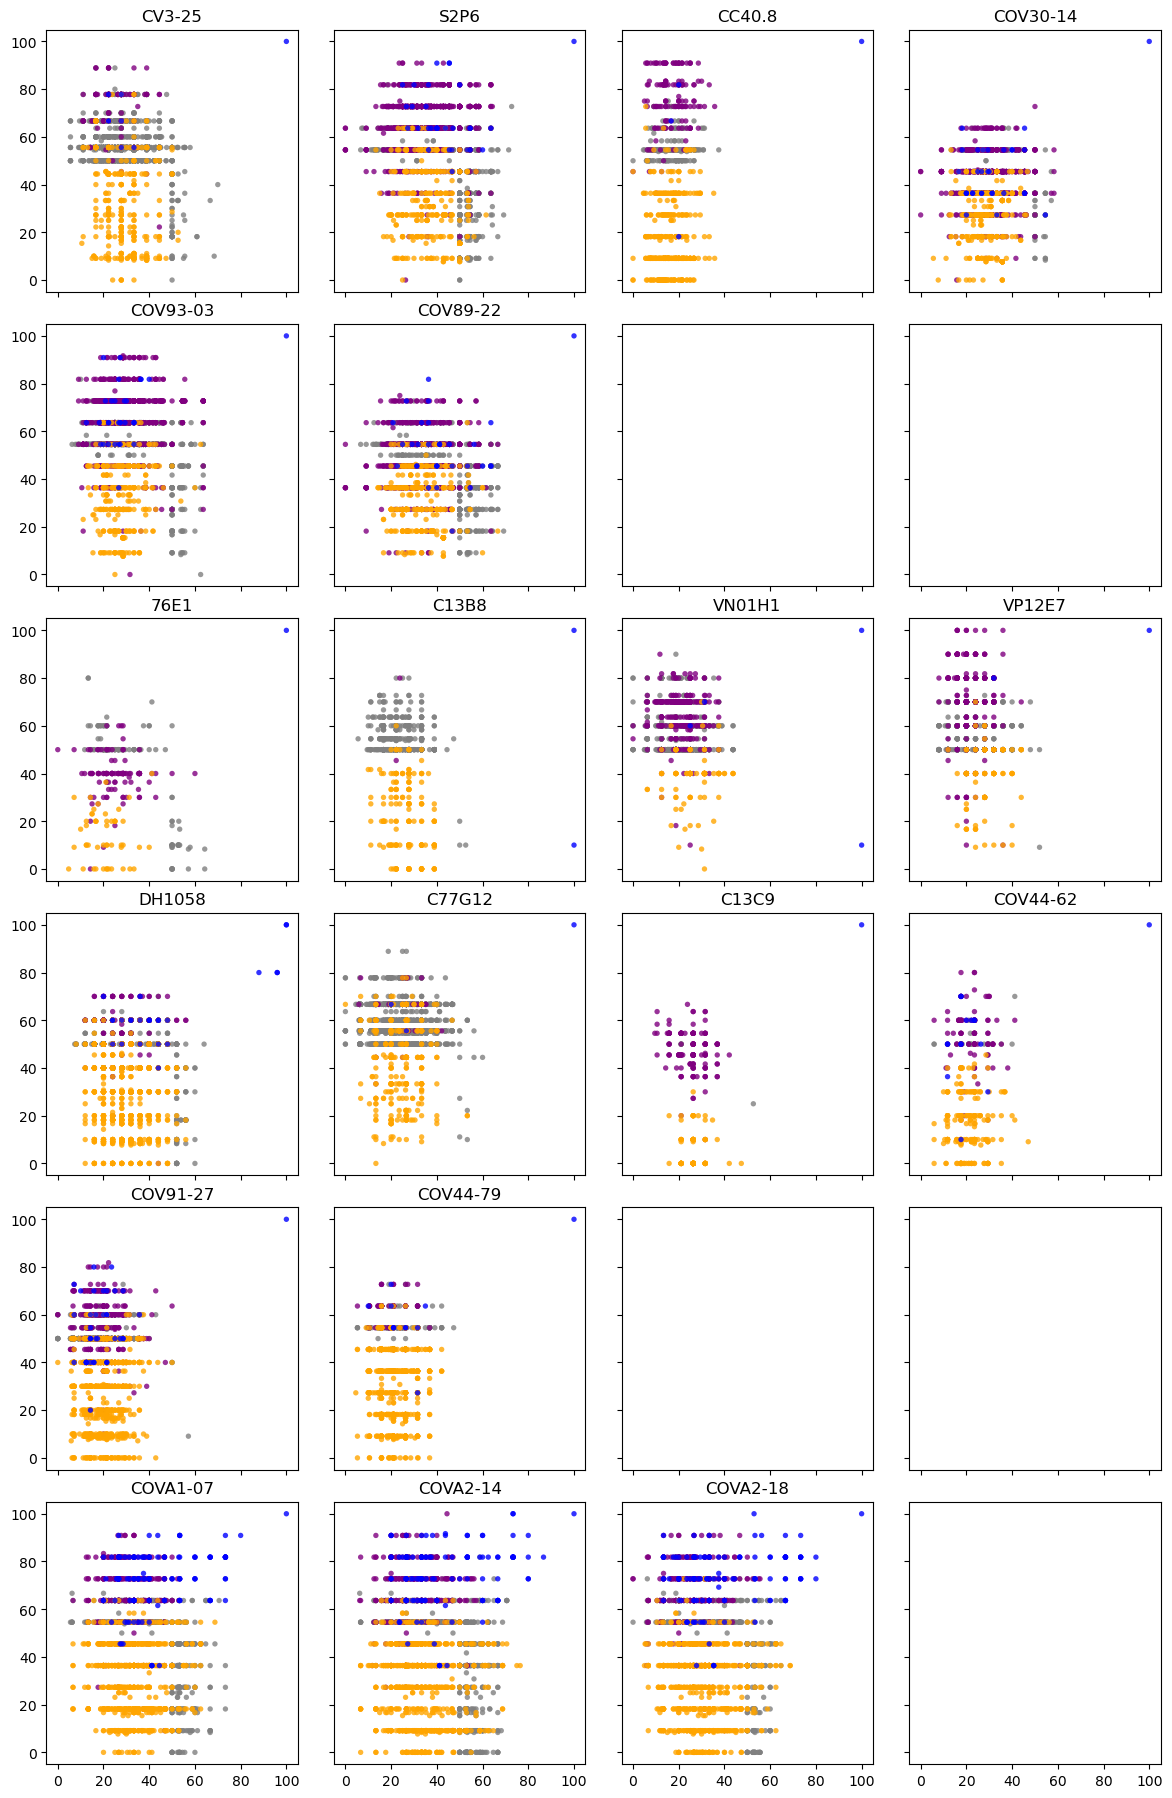

In [9]:
rows, columns = 6, 4
plot_pos = [(0, 0), (0, 1), (0, 2), (0, 3),
                (1, 0), (1, 1),
                (2, 0), (2, 1), (2, 2), (2, 3),
                (3, 0), (3, 1), (3, 2), (3, 3),
                (4, 0), (4, 1),
                (5, 0), (5, 1), (5, 2)]

color_dict = {0: "gray", 1: "purple", 2: "orange", 3: "blue"}
legend_dict = {0: "Different V Genes similar CDR3", 1: "Same Light V Gene only", 2: "Same Heavy V Gene only",
               3: "Same V genes"}

fig, ax = plt.subplots(rows, columns, sharex=True, sharey=True, figsize=(columns * 3, rows * 3))
plt.xticks([0, 20, 40, 60, 80, 100])
plt.yticks([0, 20, 40, 60, 80, 100])
rcParams.update({'font.size': 12})
plt.tight_layout()

# Next get it in a form to plot quickly
for i, (ref_ab, pts) in enumerate(all_pts):
    a, b = plot_pos[i]  # Position in grid
    pts = sorted(pts, key=lambda x: x[2])  # I want blue on top gray on bottom
    xs = [x*100 for x,y,c in pts]
    ys = [y*100 for x,y,c in pts]
    cs = [color_dict[c] for x, y, c in pts]
    ax[a, b].scatter(xs, ys, color=cs, alpha=0.8, s=15, marker="o", linewidth=0)

    ax[a, b].title.set_text(ref_ab)

# Table S3: Epitope and paratope buried surface areas in the interaction of 54043-5 with SARS-CoV-2 Spike

In [3]:
# I need 2 files:
# all abs only - all abs bound
apo_abs = "dssps/all_abs.pdb.dssp"
apo_spike = "dssps/full_s2_apo.pdb.dssp"
full_complexes = "dssps/trimer_complex.pdb.dssp"

# First I'll process only heavy chains
hc_bsa_values = hf.get_buried_resi(apo_abs, full_complexes, apo_chains=["E", "D", "H"])
# Then I'll process only light chains
lc_bsa_values = hf.get_buried_resi(apo_abs, full_complexes, apo_chains=["F", "G", "L"])
# Finally spike chains
spike_bsa_values = hf.get_buried_resi(apo_spike, full_complexes, apo_chains=["A", "B", "C"])

# Output to files
with open("data/ep_and_par_bsa_res.csv", "w") as f:
    f.write("residue #,AA,Buried surface area\n")  # Header
    f.write("Heavy Chain BSAs,,\n")
    for a, b, c in hc_bsa_values:
        if c > 0:
            f.write(f"{a},{seq3(b)},{c}\n")
    f.write("Light Chain BSAs,,\n")
    for a, b, c in lc_bsa_values:
        if c > 0:
            f.write(f"{a},{seq3(b)},{c}\n")
    f.write("Spike Chain BSAs,,\n")
    for a, b, c in spike_bsa_values:
        if c > 0:
            f.write(f"{a},{seq3(b)},{c}\n")

## Figure 4E part1: Identify S2-binding antibodies

In [4]:
# Search all coronavirus antibody-antigen co-structures by BSA to see which
# others bind the S2-region of SARS2 spike.
sab_cov_df = pd.read_csv("../excel_like/220603_sabdab_results.tsv", delimiter="\t")
sab_cov_df = sab_cov_df.drop([0,1,2]).reset_index()
sab_cov_df = sab_cov_df.reset_index()
sab_cov_df

,level_0,index,pdb,Hchain,Lchain,model,antigen_chain,antigen_type,antigen_het_name,antigen_name,...,scfv,engineered,heavy_subclass,light_subclass,light_ctype,affinity,delta_g,affinity_method,temperature,pmid
0,0,3,7byr,H,L,0,B,protein,NaN,sars-cov-2 spike glycoprotein,...,False,True,IGHV7,IGKV1,Kappa,None,None,None,None,None
1,1,4,7n8i,H,L,0,A,protein,NaN,spike glycoprotein,...,False,True,IGHV3,IGKV1,Kappa,None,None,None,None,None
2,2,5,7n8h,E,D,0,A,protein,NaN,spike glycoprotein,...,False,True,IGHV1,IGKV3,Kappa,None,None,None,None,None
3,3,6,7n8h,M,L,0,K,protein,NaN,spike glycoprotein,...,False,True,IGHV1,IGKV3,Kappa,None,None,None,None,None
4,4,7,7n8h,H,G,0,F,protein,NaN,spike glycoprotein,...,False,True,IGHV1,IGKV3,Kappa,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,975,978,7n62,H,L,0,A,protein,NaN,spike glycoprotein,...,False,True,IGHV3,IGKV3,Kappa,None,None,None,None,None
976,976,979,7n64,H,L,0,B | A,protein | protein,NA | NA,spike glycoprotein | spike glycoprotein,...,False,True,IGHV3,IGKV1,Kappa,None,None,None,None,None
977,977,980,7tht,H,L,0,C,protein,NaN,dh1042 light chain,...,False,True,IGHV1,IGKV1,Kappa,None,None,None,None,None
978,978,981,7tht,d,b,0,V,protein,NaN,spike glycoprotein,...,False,False,IGHV1,IGKV1,Kappa,None,None,None,None,None


In [ ]:
all_bsas = hf.get_all_sabdab_bsas(sab_cov_df)

all_s2_abs = []
for pdbname, bsa_list in all_bsas:
    cur_ep_res = hf.get_s2_ep_res(bsa_list)
    if cur_ep_res:
        all_s2_abs.append((pdbname, cur_ep_res))

all_s2_abs = list(sorted(all_s2_abs, key=lambda x: x[1][0]))
print(all_s2_abs)

f = open("S2 Epitopes.txt", "w")
x = 0
print("Our epitope residues are: 755 969 971 972 973 974 979 980 982 983 984 985 986 988 991 992 995")
last_pdb = -1
for pdbname, bsa_list in all_bsas:
    for resn, aa, bsa in bsa_list:
        if (int(bsa) > 0) and int(resn) > 685:
            x += 1
            if pdbname != last_pdb:
                print(f"\n\nS2-directed antibody #{x} is {pdbname} and targets residue {resn} with BSA {bsa}", end="")
                f.write(f"\n\nS2-directed antibody #{x} is {pdbname} and targets residue {resn} with BSA {bsa}")
            else:
                print(f", {resn}: {bsa}", end="")
                f.write(f", {resn}: {bsa}")
        last_pdb = pdbname


In [ ]:
pdbs = []
for name, res_list in all_s2_abs:
    pdbs.append(name[:4])

print(sorted(set(pdbs)))

In [ ]:
# We narrowed it down to these antibodies from that list
# Take the sum of BSA at each residue number and shade from 0 to most
sh_abs = ["7nab","7rnj","7sjs", "8dtr","8dtt","8dtx"]
fp_abs = ["7x9e", "7u09", "7skz", "7sl5", "7tow", "7u0a", "7u0e", "8d36", "8d6z", "8dao"]

## 4E Part 2: Aggregate BSA and shade

In [ ]:
# Step 1 take average within each pdb id
from collections import defaultdict
# ('7lab_675', [(689, 22)]), ('7lab_674', [(689, 31), (690, 1)]) is the format
ab_dict = {}
for complex_name, bsa_list in all_s2_abs:
    pdb_id = complex_name[:4]

    # Skip all S2 antibodies outside of the list I put together with Ivelin
    if pdb_id not in sh_abs + fp_abs:
        continue

    # Format will be {pdb_id: {689:[]}}
    if pdb_id not in ab_dict.keys():
        ab_dict[pdb_id] = defaultdict(list)

    for resnum, bsa in bsa_list:
        ab_dict[pdb_id][resnum].append(bsa)

# Once you have aggregated within one pdb id then take average bsa for each residue position
fp_sum_sep = defaultdict(list)
sh_sum_sep = defaultdict(list)
for pdb_id, res_dict in ab_dict.items():
    # re-aggregate averages by either stem helix or FP groups
    for resn, bsa_list in res_dict.items():
        avg = sum(bsa_list)  / float(len(bsa_list))

        if pdb_id in sh_abs:
            sh_sum_sep[resn].append(avg)
        elif pdb_id in fp_abs:
            fp_sum_sep[resn].append(avg)

print(sorted(fp_sum_sep.items()))
print(sorted(sh_sum_sep.items()))

In [ ]:
fp_sums = [(811, [10.0]), (812, [56.0, 5.0, 8.5, 10.0, 13.0, 31.0]), (813, [11.0, 10.0, 18.0, 22.5, 5.5, 18.0, 11.0, 43.0]), (814, [2.0, 59.5, 24.0, 5.0, 73.0, 18.0, 42.5, 27.0]), (815, [164.5, 135.0, 181.5, 192.5, 135.75, 170.0, 143.0, 55.5, 23.0]), (816, [47.0, 49.25, 43.0, 38.5, 36.75, 53.0, 31.0, 41.5, 74.0, 7.0]), (817, [2.0, 14.0, 61.5, 166.0, 2.0]), (818, [35.0, 23.5, 36.5, 38.0, 38.0, 75.0, 16.0, 94.5, 65.0, 103.0]), (819, [69.0, 68.0, 83.0, 85.0, 96.0, 97.0, 101.0, 92.0, 29.0, 80.0]), (820, [49.5, 48.25, 46.5, 61.0, 42.0, 60.0, 43.0, 72.0, 89.0]), (821, [93.5, 98.0, 112.0]), (822, [80.0, 70.75, 84.5, 90.0, 85.5, 106.0, 100.0, 128.0, 23.0, 117.0]), (823, [143.0, 145.0, 171.5, 152.5, 136.75, 149.0, 169.0, 92.5, 145.0]), (824, [17.0, 15.5, 8.25, 17.0, 12.0, 96.5, 85.0, 45.0]), (825, [29.0, 63.0, 39.0, 72.0, 149.0, 140.0, 155.0]), (826, [7.0, 21.0, 5.0])]
sh_sums = [(1141, [2.0]), (1142, [100.0]), (1143, [45.0]), (1144, [82.0]), (1145, [168.0, 45.0, 42.0]), (1146, [10.5, 8.0, 7.0]), (1147, [26.5, 6.0, 15.0]), (1148, [68.0, 136.5, 146.0, 167.0, 142.0]), (1149, [68.0, 64.5, 81.0, 81.0, 68.0, 12.5]), (1150, [19.0, 11.5]), (1151, [78.0, 64.5, 88.0, 60.5]), (1152, [104.0, 75.5, 70.0, 77.0, 75.0, 23.0]), (1153, [61.0, 21.0, 22.0, 18.0, 42.5, 101.0]), (1154, [45.0, 22.5]), (1155, [116.0, 91.5, 85.0, 75.0, 85.0]), (1156, [68.0, 118.5, 116.0, 117.0, 117.0, 44.0]), (1157, [145.0]), (1158, [7.0, 56.0]), (1159, [54.0, 20.0, 9.0, 9.0, 40.0, 13.5]), (1160, [15.0, 23.0, 66.5]), (1161, [74.0, 57.0]), (1162, [34.0]), (1163, [61.0]), (1164, [62.0]), (1165, [16.0])]

In [ ]:
# Once you have aggregated within one pdb id then take summed bsa for each residue position
fp_averages_sum = defaultdict(int)
sh_averages_sum = defaultdict(int)
for pdb_id, res_dict in ab_dict.items():
    # re-aggregate averages by either stem helix or FP groups
    for resn, bsa_list in res_dict.items():
        avg = sum(bsa_list)

        if pdb_id in sh_abs:
            sh_averages_sum[resn] += avg
        elif pdb_id in fp_abs:
            fp_averages_sum[resn] += avg

res_bsa_vals = sorted(list(fp_averages_sum.items()) + list(sh_averages_sum.items()))
# Write out to a file and then do the shading in excel
with open(r"data/all_s2_epitope_bsas.csv", "w") as epcsv:
    residues = [str(resn) for resn, bsa in res_bsa_vals]
    epcsv.write(",".join(residues) + "\n")

    bsas = [str(round(float(bsa), 2)) for resn, bsa in res_bsa_vals]
    epcsv.write(",".join(bsas) + "\n")

res_bsa_vals

## 4E Part 3: Create line plot

In [ ]:
# List where data comes from

# Load in final data
# Load in all sequences for the line plot
all_seqs = hf.get_fasta_tuples("../seqs/aln_OneFromAllSpecies.fasta")
# SARS2 is the first seq
sars2_seq = all_seqs[0][1]

# The positions we want to plot are the following (SARS2 residue numbering)
bsa_pos_to_use = [811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 969, 971, 972, 973, 974, 979, 980, 981, 982, 983, 984, 985, 986, 988, 991, 992, 995, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165]

# Map between amino acid residue numbers and MSA list index
sars2_pos_mapping = {}  # key = index in msa
sars2_pos_mapping_rev = {}  # key = sars2 res num
sars2_resn = 1
for i, aa in enumerate(sars2_seq):
    if aa != "-":
        sars2_pos_mapping[i] = sars2_resn
        sars2_pos_mapping_rev[sars2_resn] = i
        sars2_resn += 1

# Initialize dictionaries and count how many strains are present in each genus / at each residue position
num_in_genus = {"A": 0, "B": 0, "G": 0, "D": 0}
conservation_counts = {"A": defaultdict(int), "B": defaultdict(int), "G": defaultdict(int), "D": defaultdict(int)}
for pos in bsa_pos_to_use:
    for genus, d in conservation_counts.items():
        d[pos] = 0  # You need this to account for missing residue positions

# Update dictionary with number of strains using the same AA as SARS2 at each position
for header, seq in all_seqs:
    # Get genus
    genus = header.split("|")[1]
    num_in_genus[genus] += 1
    # count number of seqs with same AA as SARS2 at each position
    for i, aa in enumerate(seq):
        # Map to the SARS2 numbering system first
        sars2_pos = sars2_pos_mapping.get(i)
        if sars2_pos and (sars2_pos in bsa_pos_to_use):
            if sars2_seq[i] == aa:
                conservation_counts[genus][sars2_pos] += 1

Convert to percent and get in a format for plotting

In [ ]:
# Peak at it and comment on it
lineplot_lists = {"A": [], "B": [], "G": [], "D": []}
for genus, res_dict in conservation_counts.items():
    total_seqs = num_in_genus[genus]
    for res_pos, count in sorted(res_dict.items()):
        lineplot_lists[genus].append(round(100. * (count / float(total_seqs)), 2))

print(lineplot_lists.items())

Now actually plot
- Split into two sections because its so long

In [ ]:
# plt.xlabel("SARS-CoV-2 Spike Residue Position")
# plt.ylabel("% Conservation")
default_x_ticks = range(len(bsa_pos_to_use))[:29]
# Plot alphas
plt.plot(default_x_ticks, lineplot_lists["A"][:29], color="blue", label="Alphas")
plt.plot(default_x_ticks, lineplot_lists["B"][:29], color="red", label="Betas")
plt.plot(default_x_ticks, lineplot_lists["G"][:29], color="orange", label="Gammas")
plt.plot(default_x_ticks, lineplot_lists["D"][:29], color="turquoise", label="Deltas")
# plt.xticks(default_x_ticks, bsa_pos_to_use[:29])
# plt.xticks(list(range(0, len(default_x_ticks) - 1, 5)))
plt.yticks([0, 100], ["0%", "100%"])
# plt.legend()
figure = plt.gcf()
figure.set_size_inches(8, 1)
plt.tight_layout()
# plt.show()
plt.savefig("Conservation_lineplot_firsthalf.svg")# Generate the two line plots

In [ ]:
# plt.xlabel("SARS-CoV-2 Spike Residue Position")
# plt.ylabel("% Conservation")
default_x_ticks = range(len(bsa_pos_to_use))[29:]
plt.yticks([0, 100], ["0%", "100%"])
# Plot alphas
plt.plot(default_x_ticks, lineplot_lists["A"][29:], color="blue", label="Alphas")
plt.plot(default_x_ticks, lineplot_lists["B"][29:], color="red", label="Betas")
plt.plot(default_x_ticks, lineplot_lists["G"][29:], color="orange", label="Gammas")
plt.plot(default_x_ticks, lineplot_lists["D"][29:], color="turquoise", label="Deltas")
# plt.xticks(default_x_ticks, bsa_pos_to_use[29:])
# plt.xticks(list(range(29, 58, 5)))
# plt.legend()
figure = plt.gcf()
figure.set_size_inches(8, 1)
plt.tight_layout()
# plt.show()
plt.savefig("Conservation_lineplot_secondhalf.svg")

Now look at it bigger for validation and also get the legend for the figure

In [ ]:
# plt.xlabel("SARS-CoV-2 Spike Residue Position")
# plt.ylabel("% Conservation")
default_x_ticks = range(len(bsa_pos_to_use))[29:]
# Plot alphas
plt.plot(default_x_ticks, lineplot_lists["A"][29:], color="blue", label="Alphas")
plt.plot(default_x_ticks, lineplot_lists["B"][29:], color="red", label="Betas")
plt.plot(default_x_ticks, lineplot_lists["G"][29:], color="orange", label="Gammas")
plt.plot(default_x_ticks, lineplot_lists["D"][29:], color="turquoise", label="Deltas")
# plt.xticks(default_x_ticks, bsa_pos_to_use[29:])
# plt.xticks(list(range(29, 58, 5)))
# plt.legend()
figure = plt.gcf()
# figure.set_size_inches(8, 1)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# plt.show()
plt.savefig("Conservation_lineplot_legend.svg")